# Image Processing in Julia with JuliaImages Images.jl Workshop

The objective of this workshop is to give exposure for using various digital image processing methods in Julia. JuliaImages hosts the major Julia packages for image processing in which Images.jl provides access to various algorithms acting as the umbrella package. The applications of Image processing are found in areas such as machine vision, biomedical image processing and remote sensing. 

This workshop will help the Julia enthusiasts/scholars to get trained in image processing in Julia.

JuliaImages hosts major Julia packages for image processing.

![](assets/juliaimages.png)

For following along, follow the readme.md for preparation instructions of the workshop!

##### Code for this workshop can be found here: https://github.com/JuliaImages/JuliaCon23_ImageProcessingWorkshop

# Introduction

Images.jl bundles much of the functionality in JuliaImages, we intend to understand images in julia, explore various image processing methods that are available and cover the topics mentioned below:

- Images are arrays
- How are Images.jl Image are different in data organization compared to others
- Why this way of data organization help with multi dimensionality of type of image data?
- How to show images in Julia?
- What are data types of images?
- What provides read write functionality?


# Prerequisites:
- Working knowledge of Julia 

# Getting Started!
Let's activate the environment and install Images.jl in the environment.

In [5]:
using Pkg

Pkg.activate(".")
Pkg.instantiate()

  Activating project at `C:\Users\lenono\Documents\StudyCode\JuliaCon23_ImageProcessingWorkshop`


In [6]:
Pkg.add("Images")

   Resolving package versions...
  No Changes to `C:\Users\lenono\Documents\StudyCode\JuliaCon23_ImageProcessingWorkshop\Project.toml`
  No Changes to `C:\Users\lenono\Documents\StudyCode\JuliaCon23_ImageProcessingWorkshop\Manifest.toml`


In repl, We would do something like:

`] add Images`

# Loading your first image

We use the save and load provided by the FileIO.jl frontend for loading images, which delegates tasks to ImageIO.jl which
delegates tasks of loading specific types to specific packages 
like in this case it's JpegTurbo.jl which provides jpg support.

In [7]:
using Images, FileIO

Lilly is Julian Samaroo's dog. Julia Samaroo maintains GPU related
packages in Julia and utilized this picture of lilly in GPU workshop 
at JuliaCon'21 to showcase image processing tutorial using GPUs. Thank you Julian and JuliaGPU team!!

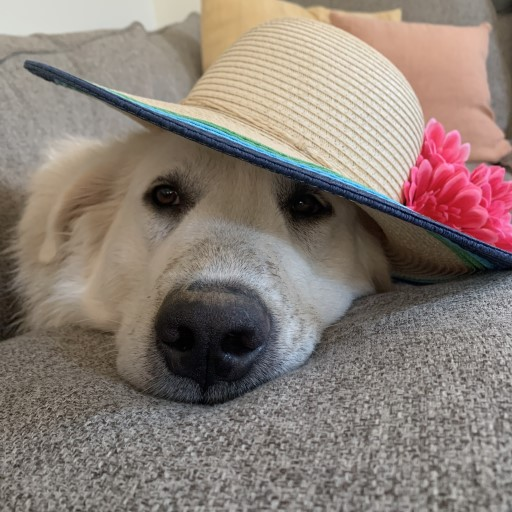

In [4]:
img = load("assets/lilly.jpg")

To save an image, you can just use save(img_path, img), where save is also provided by FileIO.

In [5]:
save("assets/save_lilly.png", img) # saving in png format

You can also utilizing TestImages.jl to get some testimages for testing ideas or just following along the documentation! The TestImages.jl package bundles several "standard" images for you.

In [6]:
using TestImages

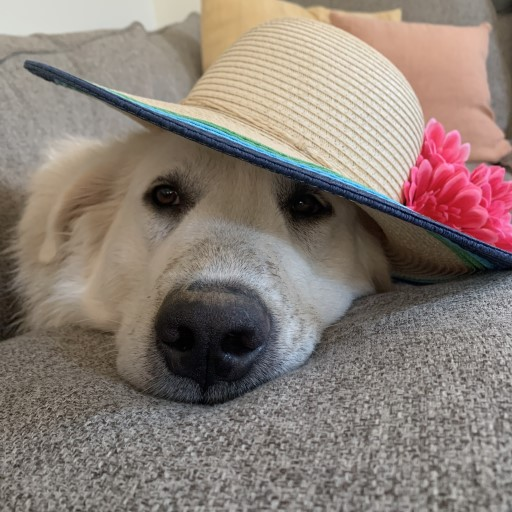

In [12]:
img = testimage("lilly")

## Visualization of Images

It's helpful to display images when doing image processing. If you use Julia through
[IJulia](https://github.com/JuliaLang/IJulia.jl) in Jupyter Notebook, images should display automatically utilizing ImageShow.

Currently there're five julia packages can be used to display an image:

* [ImageShow](https://github.com/JuliaImages/ImageShow.jl) is used to support image display in  IJulia. This happens automatically if you are `using Images`.
* [ImageInTerminal](https://github.com/JuliaImages/ImageInTerminal.jl) is used to support image display in terminal.
* [ImageView](https://github.com/JuliaImages/ImageView.jl) is an image display GUI.
* [Makie](https://github.com/JuliaPlots/Makie.jl) is also maintained by JuliaPlots but provides rich interactive functionality. 
* [Plots](https://github.com/JuliaPlots/Plots.jl) maintained by JuliaPlots is a general plotting package that support image display.

You can utilize MosaicViews.jl for displaying multiple images in one frame, you can create a bigger image from multiple image sources with `mosaicview`, which is an enhanced version of `cats`.

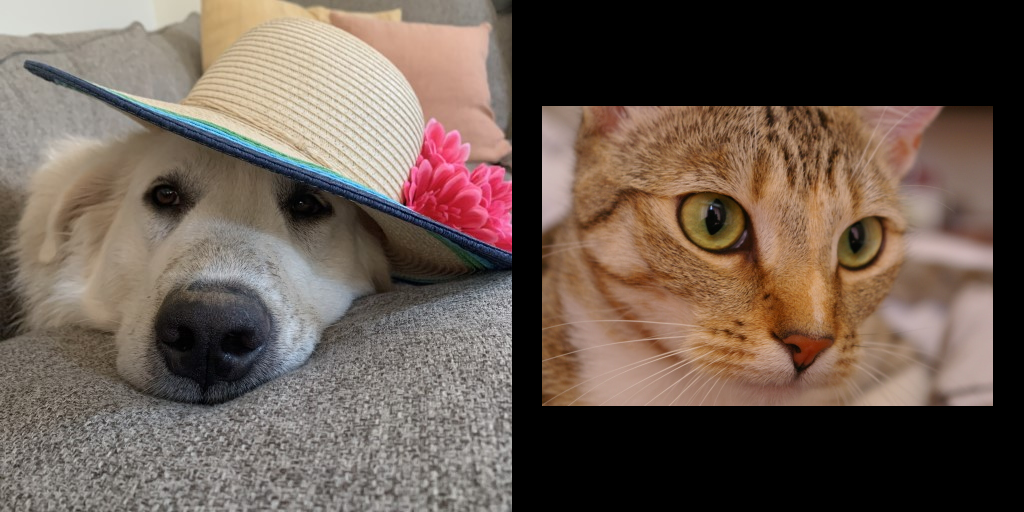

In [8]:
img1 = testimage("lilly") # julian's dog
img2 = testimage("chelsea") # stefan's cat

# you can use npad for padding between images
mosaicview(img1, img2; nrow=1) 

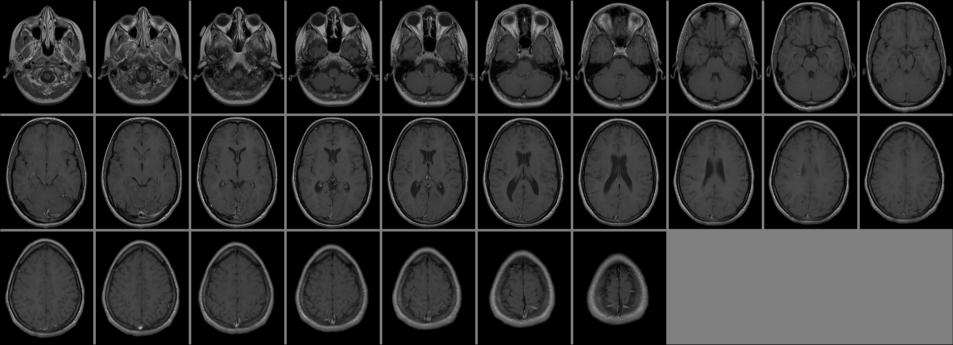

In [11]:
img3 = testimage("mri-stack") # 226×186×27 Gray image
mosaicview(img3; fillvalue=0.5, npad=5, ncol=10, rowmajor=true)

# Images are arrays

Images in Julia can be any AbstractArray. Let's understand this with example and any AbstractArray in general can be treated as an image.

In [8]:
img = rand(5,5)

5×5 Matrix{Float64}:
 0.989006  0.742953  0.898897  0.200609   0.591348
 0.513378  0.202592  0.778018  0.919335   0.893069
 0.407848  0.165723  0.205878  0.91428    0.481438
 0.794514  0.312701  0.299857  0.0859093  0.759773
 0.951647  0.621982  0.437573  0.982387   0.645462

This matrix can be converted to Gray scale image using Gray constructor and can use `.` for broadcasting to whole matrix and creating a image.

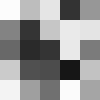

In [11]:
img_sm = Gray.(img)

In [19]:
@info "Minimum and Maximum of image:" minimum(img_sm) maximum(img_sm)

┌ Info: Minimum and Maximum:
│   minimum(img_sm) = Gray{Float64}(0.08590926667720833)
└   maximum(img_sm) = Gray{Float64}(0.9890057534841904)


In [16]:
img_gray = testimage("cameraman")

img_size = (128, 128)
img_cam = imresize(img_gray, img_size)

LoadError: UndefVarError: `testimage` not defined

In [73]:
println("Size: ", size(img_cam)) # finds dimensions of image

# Type of each element in the image
println("Element type in img: ", eltype(img_cam)) 

# Each Image in Julia is matrix of a structure 
println("Image is just a matrix of type of ", eltype(img_cam), " as can be noticed " , typeof(img_cam))
println("Pixel in JuliaImages: ", img_cam[1])

Size: (128, 128)
Element type in img: Gray{N0f8}
Image is just a matrix of type of Gray{N0f8} as can be noticed Matrix{Gray{N0f8}}
Pixel in JuliaImages: Gray{N0f8}(0.616)


Images in Julia are organized as 2D array of structures
rather than being structure of arrays like in other languages. This allows julia a lot 
of ease in write algorithms that extend to n dimensions with a single implementation.

XY axis indexing is described in image shown below, where rows act as the x axis and columns acts as the y axis: 

![](assets/xy-axis.png)

We could also select a region-of-interest from a larger image. 

First range picks the x axis dims and second range defines range for y axis

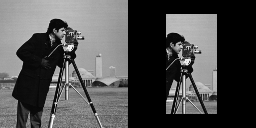

In [78]:
mosaicview(img_cam, img_cam[1:100,50:100];nrow =1) 

# Understanding a single pixel!

Elements of an image are pixels and JuliaImages treats them as first class objects, like Gray for Gray for grayscale pixels, RGB for RGB color pixels, Lab for Lab colors, etc.

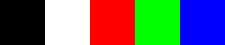

In [85]:
p1 = Gray(0.0) # black
p2 = Gray(1.0) # white
p3 = RGB(1.0, 0.0, 0.0) # red
p4 = RGB(0.0, 1.0, 0.0) # green
p5 = RGB(0.0, 0.0, 1.0) # blue
[p1 p2 p3 p4 p5]

In [ ]:
An image is just an array of pixel objects:

In [90]:
img_gray = rand(Gray, 2, 2)

@info "Size:" size(img_gray)
@info "Img:" img_gray

┌ Info: Size:
└   size(img) = (5, 5)
┌ Info: Img:
│   img_gray =
│    2×2 Array{Gray{Float64},2} with eltype Gray{Float64}:
│     Gray{Float64}(0.442455)  Gray{Float64}(0.699732)
└     Gray{Float64}(0.328035)  Gray{Float64}(0.815207)


In [91]:
img_rgb = rand(RGB,2,2)

@info "Size:" size(img_rgb)
@info "Img:" img_rgb

┌ Info: Size:
└   size(img_rgb) = (2, 2)
┌ Info: Img:
│   img_rgb =
│    2×2 Array{RGB{Float64},2} with eltype RGB{Float64}:
│     RGB{Float64}(0.574332,0.663304,0.18642)    …  RGB{Float64}(0.466229,0.256705,0.557347)
└     RGB{Float64}(0.964087,0.564323,0.0719965)     RGB{Float64}(0.0373746,0.630903,0.00128603)


Color channels are not their own dimension of the image array; rather, an image is an array of pixels. As you can see, both img_rgb and img_gray images are of size 
32×2 (instead of 2×2×3 or 3×2×2). This design choice facilitates generic code that can handle both grayscale and color images without needing to introduce extra loops or checks for a color dimension. This helps to unify computer vision and biomedical image processing communities.

# Conversion between colorants
Conversions between different Colorants are straightforward:

[ Info: Gray{Float64}
[ Info: RGB{Float64}
[ Info: RGB{Float64}[RGB{Float64}(0.44245508880123496,0.44245508880123496,0.44245508880123496) RGB{Float64}(0.6997318344785285,0.6997318344785285,0.6997318344785285); RGB{Float64}(0.3280351564021613,0.3280351564021613,0.3280351564021613) RGB{Float64}(0.8152066175768614,0.8152066175768614,0.8152066175768614)]


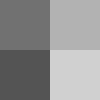

In [97]:
img_converted = RGB.(img_gray) # Gray => RGB

@info eltype(img_gray)
@info eltype(img_converted)
@info img_converted

img_converted

┌ Info: RGB{Float64}
│   img_rgb =
│    2×2 Array{RGB{Float64},2} with eltype RGB{Float64}:
│     RGB{Float64}(0.574332,0.663304,0.18642)    …  RGB{Float64}(0.466229,0.256705,0.557347)
└     RGB{Float64}(0.964087,0.564323,0.0719965)     RGB{Float64}(0.0373746,0.630903,0.00128603)
┌ Info: Gray{Float64}
│   img_converted =
│    2×2 Array{Gray{Float64},2} with eltype Gray{Float64}:
│     Gray{Float64}(0.582336)  Gray{Float64}(0.353626)
└     Gray{Float64}(0.627727)  Gray{Float64}(0.381662)


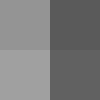

In [99]:
img_converted = Gray.(img_rgb) # RGB => Gray

@info eltype(img_rgb) img_rgb
@info eltype(img_converted) img_converted

img_converted

## Exercise!
- Convert RGB to Gray Scale using Y= 0.212R+0.715G+0.072R
- Visualize RGB channels utilizing channelview